<a href="https://colab.research.google.com/github/NuoWenLei/AAPI-text-analysis-project/blob/main/notebooks/ML_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Simple ML Models to Analyze Feature Importance

## Setup

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

In [3]:
main_path = "/content/gdrive/MyDrive/AAPI_text_analysis_project/"

## Part of Speech

### Load Data

In [46]:
df = pd.read_csv(os.path.join(main_path, "full_df_7_5_2021.csv"))
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286,"[""racial"", ""tension"", ""simmer"", ""southern"", ""b...","[""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN""]","[""nashvil"", ""tenn."", ""race-rel"", ""tension"", ""w...","[""NN"", ""NN"", ""JJ"", ""NN"", ""IN"", ""JJ"", ""NN"", ""NN...","[{""uri"": ""dmoz/Society"", ""label"": ""dmoz/Societ...","[{""uri"": ""http://en.wikipedia.org/wiki/Black_c..."
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000,"[""asian"", ""american"", ""pacif"", ""island"", ""hate...","[""JJ"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""NN...","[""the"", ""u.s."", ""seen"", ""disturb"", ""surg"", ""ha...","[""DT"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN"", ""JJ...","[{""uri"": ""dmoz/Society/Issues"", ""label"": ""dmoz...","[{""uri"": ""http://en.wikipedia.org/wiki/United_..."
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410,"[""ap-norc"", ""poll"", ""more"", ""american"", ""belie...","[""JJ"", ""NN"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""NN""]","[""washington"", ""A"", ""major"", ""american"", ""acro...","[""NN"", ""DT"", ""NN"", ""NN"", ""IN"", ""JJ"", ""JJ"", ""NN...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit..

In [47]:
limit_df = df[df['source_position'].isin(['Left',  'Right'])].copy()
limit_df['y_'] = np.where(limit_df['source_position'] == "Left", 1, 0)

In [48]:
wider_df = df[df['source_position'] != 'Center'].copy()
wider_df['y_'] = np.where(wider_df['source_position'].isin(["Left", "Lean Left"]), 1, 0)
wider_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts,y_
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286,"[""racial"", ""tension"", ""simmer"", ""southern"", ""b...","[""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN""]","[""nashvil"", ""tenn."", ""race-rel"", ""tension"", ""w...","[""NN"", ""NN"", ""JJ"", ""NN"", ""IN"", ""JJ"", ""NN"", ""NN...","[{""uri"": ""dmoz/Society"", ""label"": ""dmoz/Societ...","[{""uri"": ""http://en.wikipedia.org/wiki/Black_c...",1
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000,"[""asian"", ""american"", ""pacif"", ""island"", ""hate...","[""JJ"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""NN...","[""the"", ""u.s."", ""seen"", ""disturb"", ""surg"", ""ha...","[""DT"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN"", ""JJ...","[{""uri"": ""dmoz/Society/Issues"", ""label"": ""dmoz...","[{""uri"": ""http://en.wikipedia.org/wiki/United_...",1
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410,"[""ap-norc"", ""poll"", ""more"", ""american"", ""belie...","[""JJ"", ""NN"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""NN""]","[""washington"", ""A"", ""major"", ""american"", ""acro...","[""NN"", ""DT"", ""NN"", ""NN"", ""IN"", ""JJ"", ""JJ"", ""NN...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit...","[{""uri"": ""http:/

### Data Preprocessing

In [49]:
# Select all part of speech columns
pos_cols = [i for i in df.columns.values if i.endswith('per_word')]
pos_cols[:5]

['body_NNP_per_word',
 'body_,_per_word',
 'body_:_per_word',
 'body_JJ_per_word',
 'body_NNS_per_word']

In [50]:
# Scale 
minmax = MinMaxScaler()
pos_X = minmax.fit_transform(wider_df[pos_cols])
pos_X.shape

(277, 83)

### ML Model Analysis

In [51]:
X_train, X_test, y_train, y_test = train_test_split(pos_X, wider_df['y_'], random_state=0, train_size=0.8)

In [52]:
# Define and Train ML Models
clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        MultinomialNB()
]

clf_pred_data = []

for clf in clfs:
  print(str(clf))
  clf.fit(X_train, y_train)
  sc = clf.score(X_test, y_test)
  print(f"Score: {sc}")
  clf_pred_data.append([str(clf), sc, clf])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score: 0.6785714285714286
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Score: 0.6428571428571429
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, 

In [53]:
clf_pred_df = pd.DataFrame(clf_pred_data, columns = ["clf_name", "score", "clf"])
clf_pred_df

,clf_name,score,clf
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.678571,"LogisticRegression(C=1.0, class_weight=None, d..."
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.642857,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
2,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.642857,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
3,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.678571,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.410714,"GaussianNB(priors=None, var_smoothing=1e-09)"
5,"MultinomialNB(alpha=1.0, class_prior=None, fit...",0.660714,"MultinomialNB(alpha=1.0, class_prior=None, fit..."


#### Gradient Boosting Features

In [ ]:
gradient_boost_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[3].feature_importances_), key = lambda x: x[1], reverse = True))

In [ ]:
gradient_boost_features[:10]

[('body_NN_per_word', 0.11358763414122904),
 ('body_)_per_word', 0.07020073875791459),
 ('body_NNPS_per_word', 0.06599550446797196),
 ('body_._per_word', 0.06169180588108166),
 ('body_(_per_word', 0.0614598675807045),
 ('body_VBG_per_word', 0.058251795223740424),
 ('body_NNP_per_word', 0.05528308065200819),
 ('title_NNP_per_word', 0.05447362097992952),
 ('body_WP$_per_word', 0.04251078116753591),
 ('body_VBZ_per_word', 0.04095709342445697)]

#### Logistic Regression Features

In [ ]:
clf_pred_df['clf'].iloc[0].coef_.shape

(1, 83)

In [ ]:
log_reg_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[0].coef_[0]), key = lambda x: x[1], reverse = True))

In [ ]:
log_reg_features[:5] # Most Indicative of Left Media

[('body_VB_per_word', 1.0771721117164228),
 ('body_NN_per_word', 0.9983560577963879),
 ('title_RB_per_word', 0.8254950444552932),
 ('title_VBD_per_word', 0.7497087934291109),
 ('body_RBR_per_word', 0.6318631382914993)]

In [ ]:
log_reg_features[-5:] # Most Indicative of Right Media

[('body_WRB_per_word', -0.6737956002229745),
 ('title_TO_per_word', -0.6768760567931136),
 ('body_NNP_per_word', -0.8924345722453336),
 ('body_NNPS_per_word', -0.9705572160033403),
 ('title_JJR_per_word', -0.9769917900842598)]

#### Multinomial Naive Bayes Features

In [ ]:
clf_pred_df['clf'].iloc[5]._get_coef().shape

(1, 83)

In [ ]:
mult_nb_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[5]._get_coef()[0]), key = lambda x: x[1], reverse = True))

In [ ]:
mult_nb_features[:5]

[('body_``_per_word', -3.195036116006733),
 ('body_,_per_word', -3.2456382670727395),
 ('body_._per_word', -3.2590968874395188),
 ('body_VBG_per_word', -3.2605039530355464),
 ("body_''_per_word", -3.2804713106102996)]

In [ ]:
mult_nb_features[-5:]

[('title_PDT_per_word', -6.965495475484977),
 ('title_$_per_word', -6.965495475484977),
 ('title_TO_per_word', -7.145320152080345),
 ('title_UH_per_word', -7.658642656044923),
 ('title_RBS_per_word', -7.658642656044923)]

### Dimension Reduction Analysis

#### PCA Analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
decomposed_X = pca.fit_transform(wider_df[pos_cols])

In [ ]:
print(pca.explained_variance_ratio_)

[0.45375008 0.1326666 ]


In [ ]:
decomposed_X.shape

(277, 2)

In [ ]:
wider_df[pos_cols].shape

(277, 83)

In [ ]:
minmax = MinMaxScaler()
decomp_minmax_X = pd.DataFrame(minmax.fit_transform(decomposed_X), columns = ["0", "1"])
decomp_minmax_X['y_'] = wider_df['y_']

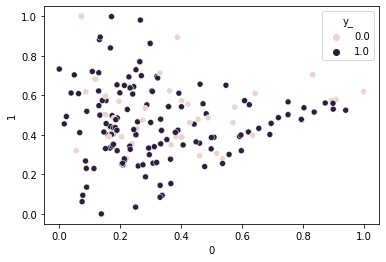

In [ ]:
sns.scatterplot(data = decomp_minmax_X, x = "0", y = "1", hue = "y_")

#### TSNE Analysis

In [ ]:
from sklearn.manifold import TSNE
import time

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=15, n_iter=300)
tsne_processed_X = tsne.fit_transform(wider_df[pos_cols])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 277 samples in 0.002s...
[t-SNE] Computed neighbors for 277 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 277 / 277
[t-SNE] Mean sigma: 0.107058
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.738831
[t-SNE] KL divergence after 300 iterations: 0.949706
t-SNE done! Time elapsed: 0.49987077713012695 seconds


In [ ]:
minmax = MinMaxScaler()
minmaxed_X = pd.DataFrame(minmax.fit_transform(tsne_processed_X), columns = ["0", "1"])
minmaxed_X['y_'] = wider_df['y_']

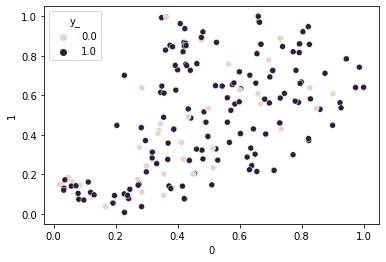

In [ ]:
sns.scatterplot(data = minmaxed_X, x = "0", y = "1", hue = "y_")

## T testing

### Load Data

In [80]:
from scipy import stats
from itertools import combinations

In [76]:
position_list = ["0_per_article_left", "1_per_article_lean_left", "2_per_article_center", "3_per_article_lean_right", "4_per_article_right"]

In [17]:
title_df = pd.read_csv(os.path.join(main_path, "title_stem_dataframe.csv"))
title_df.head()

,Lean Left,Left,Center,Lean Right,Right,stem,pos,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,11,0,15,0,4,racial,JJ,30,0.000000,0.063584,0.105263,0.0,0.066372,0.000000,0.063584,0.105263,0.0,0.066372
1,3,1,1,0,0,tension,NN,5,0.027027,0.017341,0.000000,0.0,0.004425,0.027027,0.017341,0.000000,0.0,0.004425
2,2,1,1,0,0,simmer,VB,4,0.027027,0.011561,0.000000,0.0,0.004425,0.027027,0.011561,0.000000,0.0,0.004425
3,3,1,1,0,0,southern,JJ,5,0.027027,0.017341,0.000000,0.0,0.004425,0.027027,0.017341,0.000000,0.0,0.004425
4,4,1,2,0,0,baptist,NN,7,0.027027,0.023121,0.000000,0.0,0.008850,0.027027,0.023121,0.000000,0.0,0.008850


In [18]:
body_df = pd.read_csv(os.path.join(main_path, "body_stem_dataframe.csv"))
body_df.head()

,Lean Left,Left,Center,Lean Right,Right,stem,pos,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,10,3,4,0,0,nashvil,NN,17,0.081081,0.057803,0.000000,0.000000,0.017699,0.081081,0.057803,0.000000,0.000000,0.017699
1,4,0,1,0,0,tenn.,NN,5,0.000000,0.023121,0.000000,0.000000,0.004425,0.000000,0.023121,0.000000,0.000000,0.004425
2,7,2,3,0,1,race-rel,JJ,13,0.054054,0.040462,0.026316,0.000000,0.013274,0.054054,0.040462,0.026316,0.000000,0.013274
3,24,3,20,2,2,tension,NN,51,0.081081,0.138728,0.052632,0.068966,0.088496,0.081081,0.138728,0.052632,0.068966,0.088496
4,34,6,43,4,10,within,IN,97,0.162162,0.196532,0.263158,0.137931,0.190265,0.162162,0.196532,0.263158,0.137931,0.190265


In [37]:
concept_df = pd.read_csv(os.path.join(main_path, "concept_dataframe.csv"))
concept_df.head()

,Left,Lean Left,Center,Lean Right,Right,concept_data,concept_label,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,concept_type
0,1,4,1,0,0,"{""label"": ""Black church"", ""score"": 5, ""type"": ...",Black church,6,0.027027,0.023121,0.000000,0.000000,0.004425,0.027027,0.023121,0.000000,0.000000,0.004425,person
1,1,3,1,0,0,"{""label"": ""The Reverend"", ""score"": 5, ""type"": ...",The Reverend,5,0.027027,0.017341,0.000000,0.000000,0.004425,0.027027,0.017341,0.000000,0.000000,0.004425,person
2,1,3,2,0,0,"{""label"": ""Christian denomination"", ""score"": 5...",Christian denomination,6,0.027027,0.017341,0.000000,0.000000,0.008850,0.027027,0.017341,0.000000,0.000000,0.008850,wiki
3,1,3,2,0,0,"{""label"": ""Southern Baptist Convention"", ""scor...",Southern Baptist Convention,6,0.027027,0.017341,0.000000,0.000000,0.008850,0.027027,0.017341,0.000000,0.000000,0.008850,org
4,0,5,1,1,1,"{""label"": ""Critical race theory"", ""score"": 5, ...",Critical race theory,8,0.000000,0.028902,0.026316,0.034483,0.004425,0.000000,0.028902,0.026316,0.034483,0.004425,wiki


In [38]:
category_df = pd.read_csv(os.path.join(main_path, "category_dataframe.csv"))

In [39]:
category_df.head()

,Left,Lean Left,Center,Lean Right,Right,category,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,1,5,2,0,0,dmoz/Society,8,0.027027,0.028902,0.000000,0.000000,0.008850,0.027027,0.028902,0.000000,0.000000,0.008850
1,22,116,147,21,23,news/Politics,329,0.594595,0.670520,0.605263,0.724138,0.650442,0.594595,0.670520,0.605263,0.724138,0.650442
2,1,4,2,0,0,dmoz/Society/Religion_and_Spirituality,7,0.027027,0.023121,0.000000,0.000000,0.008850,0.027027,0.023121,0.000000,0.000000,0.008850
3,37,173,226,29,38,dmoz/Society/Issues/Race-Ethnic-Religious_Rela...,503,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1,4,2,0,0,dmoz/Society/Religion_and_Spirituality/Christi...,7,0.027027,0.023121,0.000000,0.000000,0.008850,0.027027,0.023121,0.000000,0.000000,0.008850


### Word Choice and Part of Speech

In [19]:
# T-Test each Part of Speech by 2-sample testing left and right per_article

#### Title Test

In [65]:
pos_dict_title = {}
for pos in title_df["pos"].unique():
  pos_dict_title[pos] = title_df[title_df["pos"] == pos]

In [66]:
pos_dict_title.keys()

dict_keys(['JJ', 'NN', 'VB', 'MD', 'IN', 'DT', 'CD', 'WR', 'RB', 'PR', 'RP', 'PD', 'TO', 'FW', 'WP', 'UH'])

In [81]:
for pair in combinations(position_list, 2):
  print(f"Overall T-test for Variables: {pair}")
  print(stats.ttest_ind(title_df[pair[0]], title_df[pair[1]]))
  print()
  print("Specific T-test per POS")
  for k in pos_dict_title.keys():
    try:
      print(k)
      print(stats.ttest_ind(pos_dict_title[k][pair[0]], pos_dict_title[k][pair[1]]))
    except:
      pass
  print()
  print()

Overall T-test for Variables: ('0_per_article_left', '1_per_article_lean_left')
Ttest_indResult(statistic=-0.06827058055455752, pvalue=0.9455759015476233)

Specific T-test per POS
JJ
Ttest_indResult(statistic=-1.010322576557726, pvalue=0.3132130379041699)
NN
Ttest_indResult(statistic=0.289006347024447, pvalue=0.7726173821206147)
VB
Ttest_indResult(statistic=-0.26289058614538946, pvalue=0.7927486602440571)
MD
Ttest_indResult(statistic=-2.713602101199872, pvalue=0.026509885484624286)
IN
Ttest_indResult(statistic=0.6279068260972062, pvalue=0.5340281684389822)
DT
Ttest_indResult(statistic=1.4420059831698175, pvalue=0.17488720532618)
CD
Ttest_indResult(statistic=0.7020723057296794, pvalue=0.4865068214628203)
WR
Ttest_indResult(statistic=0.10980872167831707, pvalue=0.9225865196629492)
RB
Ttest_indResult(statistic=-2.32794489958032, pvalue=0.02457616593069109)
PR
Ttest_indResult(statistic=0.7994429198606129, pvalue=0.43738793372509777)
RP
Ttest_indResult(statistic=nan, pvalue=nan)
PD
Ttest_in

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#### Body Test

In [30]:
pos_dict_body = {}
for pos in body_df["pos"].unique():
  pos_dict_body[pos] = body_df[body_df["pos"] == pos]


In [31]:
pos_dict_body.keys()

dict_keys(['NN', 'JJ', 'IN', 'VB', 'DT', 'MD', 'PR', 'CD', 'RB', 'EX', 'WP', 'CC', 'WR', 'UH', 'RP', 'WD', 'TO', 'PD', 'FW', '$'])

In [33]:
stats.ttest_ind(body_df["0_per_article_left"], body_df["4_per_article_right"]) # WOW, DID NOT EXPECT THAT
# Reject Null Hypothesis for Word Choice Effect Between Left and Right Media Articles!!!

Ttest_indResult(statistic=-2.037530872334374, pvalue=0.041606505612996406)

In [36]:
body_df.shape # Large Sample of over 13000 words compared

(13634, 18)

In [83]:
for pair in combinations(position_list, 2):
  print(f"Overall T-test for Variables: {pair}")
  print(stats.ttest_ind(body_df[pair[0]], body_df[pair[1]]))
  print()
  print("Specific T-test per POS")
  for k in pos_dict_body.keys():
    print(k)
    print(stats.ttest_ind(pos_dict_body[k][pair[0]], pos_dict_body[k][pair[1]]))
  print()
  print()

Overall T-test for Variables: ('0_per_article_left', '1_per_article_lean_left')
Ttest_indResult(statistic=-1.3994640959009577, pvalue=0.16168523421229444)

Specific T-test per POS
NN
Ttest_indResult(statistic=-0.642864211102849, pvalue=0.5203223577904155)
JJ
Ttest_indResult(statistic=-0.34171645721754446, pvalue=0.7325774558416296)
IN
Ttest_indResult(statistic=-0.5405639317255972, pvalue=0.5894480320490916)
VB
Ttest_indResult(statistic=-1.1504447587270399, pvalue=0.2500185740636475)
DT
Ttest_indResult(statistic=-0.04840957697051736, pvalue=0.9616433722264511)
MD
Ttest_indResult(statistic=0.04360550847715614, pvalue=0.9655520300639063)
PR
Ttest_indResult(statistic=-0.43230164329848214, pvalue=0.6679656137832597)
CD
Ttest_indResult(statistic=-0.20535964044764943, pvalue=0.8373365789924865)
RB
Ttest_indResult(statistic=-0.6746834183808997, pvalue=0.5000127671792554)
EX
Ttest_indResult(statistic=nan, pvalue=nan)
WP
Ttest_indResult(statistic=-0.6100226904704538, pvalue=0.5587720628258435)
C

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


FW
Ttest_indResult(statistic=2.6874192494328497, pvalue=0.012389062561097045)
$
Ttest_indResult(statistic=1.0, pvalue=0.42264973081037427)


Overall T-test for Variables: ('1_per_article_lean_left', '4_per_article_right')
Ttest_indResult(statistic=-0.5684660750745008, pvalue=0.5697232167630117)

Specific T-test per POS
NN
Ttest_indResult(statistic=-0.3040956494446955, pvalue=0.7610593758627344)
JJ
Ttest_indResult(statistic=-0.44817006912075397, pvalue=0.6540482707540278)
IN
Ttest_indResult(statistic=-0.18058841573468506, pvalue=0.8568851719513099)
VB
Ttest_indResult(statistic=0.021883303800267175, pvalue=0.982541961226118)
DT
Ttest_indResult(statistic=-0.0045461960935264745, pvalue=0.9963964560805467)
MD
Ttest_indResult(statistic=0.09514858128037532, pvalue=0.9249263562416836)
PR
Ttest_indResult(statistic=-0.15368767014184942, pvalue=0.8786692953451709)
CD
Ttest_indResult(statistic=0.09450873951493888, pvalue=0.9247256195250906)
RB
Ttest_indResult(statistic=-0.6743176365629363, pvalue=

### Concept and Category

#### Category T-testing

In [85]:
for pair in combinations(position_list, 2):
  print(pair)
  print()
  print(stats.ttest_ind(category_df[pair[0]], category_df[pair[1]]))
  print()


('0_per_article_left', '1_per_article_lean_left')

Ttest_indResult(statistic=0.1824979253684941, pvalue=0.8553212748265911)

('0_per_article_left', '2_per_article_center')

Ttest_indResult(statistic=0.2179097475582852, pvalue=0.8276548246272344)

('0_per_article_left', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.0024567960217716507, pvalue=0.9980414751062926)

('0_per_article_left', '4_per_article_right')

Ttest_indResult(statistic=0.4258863739791736, pvalue=0.6705109684768312)

('1_per_article_lean_left', '2_per_article_center')

Ttest_indResult(statistic=0.03473014314815723, pvalue=0.972319151203054)

('1_per_article_lean_left', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.1721707813038536, pvalue=0.8634250346840642)

('1_per_article_lean_left', '4_per_article_right')

Ttest_indResult(statistic=0.23289375428127693, pvalue=0.8160104930635901)

('2_per_article_center', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.20516940034994705, pvalue=0.83758

#### Concept T-testing

In [87]:
# General T-test
for pair in combinations(position_list, 2):
  print(pair)
  print()
  print(stats.ttest_ind(concept_df[pair[0]], concept_df[pair[1]]))
  print()

('0_per_article_left', '1_per_article_lean_left')

Ttest_indResult(statistic=0.34462626380260847, pvalue=0.730388764151751)

('0_per_article_left', '2_per_article_center')

Ttest_indResult(statistic=0.38355256383049363, pvalue=0.7013251868844796)

('0_per_article_left', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.003752250855254138, pvalue=0.9970062824483188)

('0_per_article_left', '4_per_article_right')

Ttest_indResult(statistic=0.758106510942182, pvalue=0.448420268527002)

('1_per_article_lean_left', '2_per_article_center')

Ttest_indResult(statistic=0.057828783737529955, pvalue=0.953887147712695)

('1_per_article_lean_left', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.2544238099650504, pvalue=0.7991778352061816)

('1_per_article_lean_left', '4_per_article_right')

Ttest_indResult(statistic=0.3907238399039532, pvalue=0.6960167714627783)

('2_per_article_center', '3_per_article_lean_right')

Ttest_indResult(statistic=-0.29192492157743927, pvalue=0.7703552

In [88]:
# Type-specific
type_dict = {}
for t in concept_df["concept_type"].unique():
  type_dict[t] = concept_df[concept_df["concept_type"] == t]

In [90]:
for pair in combinations(position_list, 2):
  print(pair)
  for k in type_dict.keys():
    print(k)
    res = stats.ttest_ind(type_dict[k][pair[0]], type_dict[k][pair[1]])
    print(res)
  print()
  print()

('0_per_article_left', '1_per_article_lean_left')
person
Ttest_indResult(statistic=-0.520959854651316, pvalue=0.6025136401089304)
wiki
Ttest_indResult(statistic=0.12817739082484456, pvalue=0.8980185741126037)
org
Ttest_indResult(statistic=1.2783630231453518, pvalue=0.20154758892257674)
loc
Ttest_indResult(statistic=0.14720435621561873, pvalue=0.8829964798852615)


('0_per_article_left', '2_per_article_center')
person
Ttest_indResult(statistic=-0.6584666738754443, pvalue=0.5103945590212097)
wiki
Ttest_indResult(statistic=0.14132724858856707, pvalue=0.8876224494254314)
org
Ttest_indResult(statistic=1.634283034557768, pvalue=0.10265163262662387)
loc
Ttest_indResult(statistic=0.22370142265694762, pvalue=0.8230293020722171)


('0_per_article_left', '3_per_article_lean_right')
person
Ttest_indResult(statistic=-1.5605061723661942, pvalue=0.11896649303500184)
wiki
Ttest_indResult(statistic=0.12756498471254163, pvalue=0.8985031765275064)
org
Ttest_indResult(statistic=3.3407117844318743, pvalue=

## Top Picks

### ML Model POS Analysis and Weightage

#### Logistic Regression (Accuracy of 0.679)

In [54]:
log_reg_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[0].coef_[0]), key = lambda x: x[1], reverse = True))

In [55]:
log_reg_features[:5] # Most Indicative of Left Media

[('body_VB_per_word', 1.0771721117164228),
 ('body_NN_per_word', 0.9983560577963879),
 ('title_RB_per_word', 0.8254950444552932),
 ('title_VBD_per_word', 0.7497087934291109),
 ('body_RBR_per_word', 0.6318631382914993)]

In [56]:
log_reg_features[-5:] # Most Indicative of Right Media

[('body_WRB_per_word', -0.6737956002229745),
 ('title_TO_per_word', -0.6768760567931136),
 ('body_NNP_per_word', -0.8924345722453336),
 ('body_NNPS_per_word', -0.9705572160033403),
 ('title_JJR_per_word', -0.9769917900842598)]

#### Gradient Boosting Classifier (Accuracy of 0.679)

In [57]:
gradient_boost_features = list(sorted(zip(wider_df[pos_cols].columns.values, clf_pred_df['clf'].iloc[3].feature_importances_), key = lambda x: x[1], reverse = True))

In [58]:
gradient_boost_features[:10] # 10 Most Considered Features

[('body_NN_per_word', 0.11190897961975291),
 ('body_)_per_word', 0.08302422067493218),
 ('body_NNPS_per_word', 0.06744038711897547),
 ('body_._per_word', 0.06153040341337466),
 ('body_VBG_per_word', 0.056403508964272396),
 ('body_NNP_per_word', 0.055575667756143955),
 ('title_NNP_per_word', 0.054822291740529584),
 ('body_(_per_word', 0.049050311403254096),
 ('body_WP$_per_word', 0.0456683609483241),
 ('body_VBZ_per_word', 0.04489864918724398)]

### T-testing

#### Concept Analysis

In [91]:
stats.ttest_ind(type_dict["org"]["1_per_article_lean_left"], type_dict["org"]["3_per_article_lean_right"])
# Organization Concept Appearance Frequency Difference Between Lean Left and Lean Right Rejects Null Hypothesis

Ttest_indResult(statistic=2.661611993602285, pvalue=0.007956181782695835)

In [94]:
type_dict["org"].shape

(349, 19)

#### Word Choice Analysis

In [99]:
stats.ttest_ind(body_df["0_per_article_left"], body_df["4_per_article_right"])
# Reject Null Hypothesis for Word Choice Frequency Between Left and Right Media Articles

Ttest_indResult(statistic=-2.037530872334374, pvalue=0.041606505612996406)

In [100]:
stats.ttest_ind(body_df["1_per_article_lean_left"], body_df["3_per_article_lean_right"])
# Also Reject Null Hypothesis for Word Choice Frequency Between Lean Left and Lean Right Media Articles

Ttest_indResult(statistic=-2.650916855085785, pvalue=0.00803199777917408)

In [103]:
body_df.shape # Ample sample size of over 13,000

(13634, 18)